In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [165]:
#in github, the dataset name is house-price-prediction.csv
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [166]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1. Frequent Category Imputation

In [167]:
freq_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
freq_df.head(40)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [168]:
freq_df.shape

(1460, 4)

In [169]:
freq_df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [170]:
freq_df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

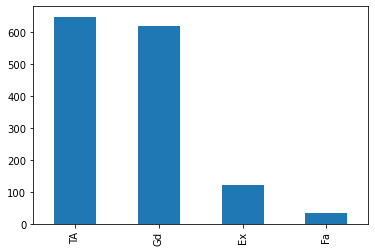

In [171]:
#checking the count of each in bar plot
freq_df['BsmtQual'].value_counts().plot.bar()

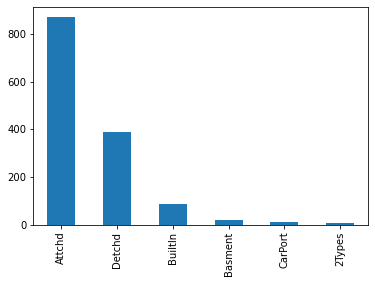

In [172]:
freq_df['GarageType'].value_counts().plot.bar()

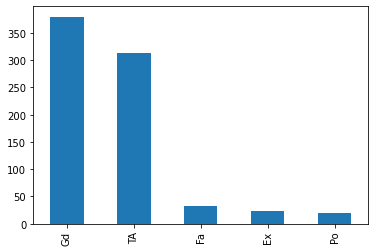

In [173]:
freq_df['FireplaceQu'].value_counts().plot.bar()

In [174]:
def impute_frequent(freq_df,variable):
    freq_df[variable] = freq_df[variable].fillna(freq_df[variable].mode()[0])

In [175]:
for i in freq_df.columns[:3]:
    freq_df[i] = freq_df[i].fillna(freq_df[i].mode()[0])    

In [176]:
#checking the updation of NaN values by the frequent category
freq_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


## 2. Adding a variable to capture NaN
### this helps to find importance of missing values if you have more NaN values in feature

In [177]:
var_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
var_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [178]:
# in this first, new column is created to capture the presence/absence of the missing values
# then frequent values are replaced in places of NaN
def is_nan_feature(df,variable):
    df[variable+'_is_nan'] = np.where(df[variable].isnull(),1,0)
    df[variable] = df[variable].fillna(df[variable].mode()[0])

In [179]:
for i in var_df.columns[:3]:
    is_nan_feature(var_df,i)

In [180]:
var_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_is_nan,FireplaceQu_is_nan,GarageType_is_nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


## 3. Replacing with new category, if we have more frequent categories in the same feature

In [181]:
cat_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
cat_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [182]:
#new category can be labeled as 'others'
def new_cat(df,variable):
    df[variable] = df[variable].fillna('Others')

In [183]:
for i in cat_df[:3]:
    new_cat(cat_df,i)

In [184]:
cat_df.head(40)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Others,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Others,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


### As a conclusion for this dataset, 

#### 1. adding variable to capture NaN applies for 'FireplaceQu'
#### 2. adding new category applies for 'BsmtQual'
#### 3. replacing with the most frequent category applies for 'GarageType'